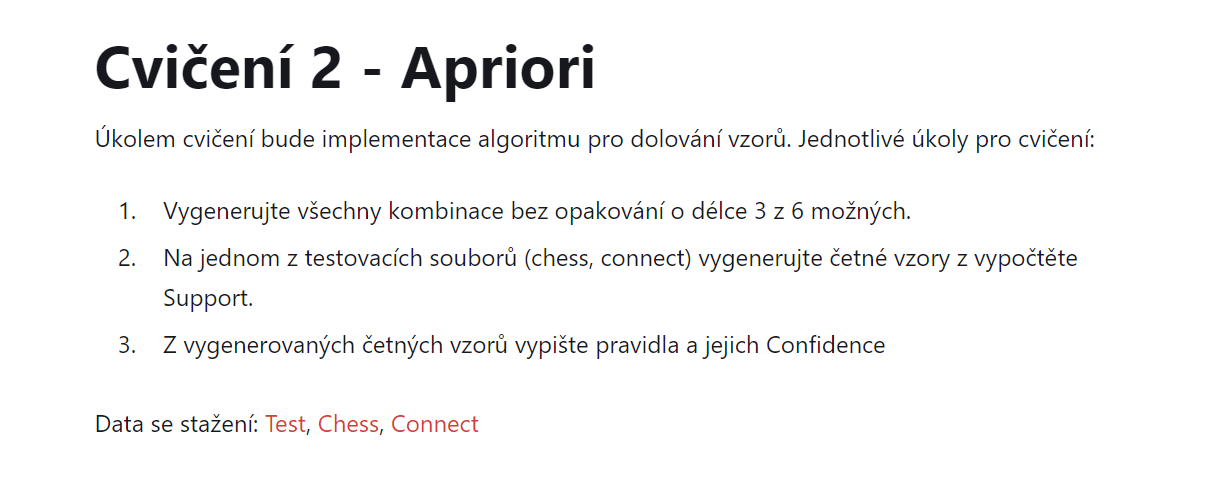

In [1]:
import os
import pandas as pd
import numpy as np

# 1

In [465]:
def combination(k, n):
    combinations = []
    for a in range(1, n):
        for b in range(a+1, n):
            for c in range(b+1, n):
                combinations.append([a, b, c]);
    return combinations

In [481]:
def combination2(k, lst):
    if k == 0:
        return [[]]   
    l =[]
    for i in range(0, len(lst)):       
        m = lst[i]
        remLst = lst[i + 1:]
        for p in combination2(k-1 ,remLst):
            l.append([m]+p)
    return l

In [482]:
combination(3, 6)

[[1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 3, 4],
 [1, 3, 5],
 [1, 4, 5],
 [2, 3, 4],
 [2, 3, 5],
 [2, 4, 5],
 [3, 4, 5]]

In [483]:
combination2(3, list(range(1, 6)))

[[1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 3, 4],
 [1, 3, 5],
 [1, 4, 5],
 [2, 3, 4],
 [2, 3, 5],
 [2, 4, 5],
 [3, 4, 5]]

# 2

In [484]:
os.getcwd()

'C:\\Users\\proko\\Desktop\\university\\iii\\mad\\exercises\\1\\2'

In [485]:
filename0 = 'itemsets_test.dat'
filename1 = 'chess.dat'
filename2 = 'connect.dat'

path = f'data\\{filename0}'

In [486]:
def load(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    return [l.strip() for l in lines]

In [487]:
def create_number_matrix(data):
    numbers = []
    
    for item in data:
        n = item.split(' ')
        numbers.append([int(n_i) for n_i in n])

    return numbers

In [488]:
data = create_number_matrix(load(path))

In [489]:
data

[[1, 2, 5],
 [1, 4, 5],
 [1, 3],
 [2, 3, 4],
 [2, 3, 5],
 [4, 5],
 [1, 3, 4, 5],
 [1, 2, 5],
 [1, 3, 5],
 [1]]

## Creation of binary matrix

In [490]:
def create_bin_matrix(data):
    
    minimum_value = np.min([np.min(a) for a in data])
    maximum_value = np.max([np.max(a) for a in data])
    
        
    converted_min = 0
    shift = minimum_value
    converted_max = maximum_value - shift
    
    M = np.zeros(shape=(len(data), converted_max+1))
    
    for row_i in range(len(data)):
        for col_i in range(len(data[row_i])):
            value = data[row_i][col_i]
            converted_value = value - shift
            M[row_i, converted_value] = 1
        
    return M, (minimum_value, maximum_value, shift)

In [491]:
M, shape = create_bin_matrix(data)

In [492]:
pd.DataFrame(M).head()

,0,1,2,3,4
0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0


## Apriori

- omezeni pomoci hloubky
- omezeni pomoci supportu

In [493]:
class Node:
    def __init__(self, value, parent, support = 1):
        self.value = value
        self.children = []
        self.parent = parent
        self.support = support
    
    def __str__(self):
        return f'Value={self.value}'

In [494]:
class Rule:
    def __init__(self, X, Y, conf):
        self.X = X
        self.Y = Y
        self.conf = conf
        
    def __str__(self):
        return f'{self.X}->{self.Y} ... conf={self.conf}'

In [495]:
class Apriori:
    def __init__(self):
        pass
    
    def get_support(self, indicies):
        sets = []
        for index in indicies:
            ind = np.where(self.matrix[:, index] == 1)[0]
            sets.append(set(ind))
            
        result = sets[0]
        for i in range(1, len(sets)):
            result = result.intersection(sets[i])        
        return len(result) / self.matrix.shape[0]
    
    def build(self, matrix, support=None, depth=None):
        self.root = Node([], None)
        self.matrix = matrix
        self.support = support
        self.depth = depth
        bin_matrix = np.array(matrix)
        indicies = list(range(matrix.shape[1]))
        self.pattern2Support = {}
    
        for index in indicies:
            self.step(indicies, index, self.root)
        
    def step(self, indicies, start, parent):
        #Podminka navratu
        if start > len(indicies) - 1:
            return
        
        #Kontrola hloubky
        if self.depth != None and start+1 > self.depth:
            return     
    
        current_value = [start] 
        if parent: 
            current_value = [start] + parent.value.copy()

            
        current_support = self.get_support(current_value)
            

        if self.support != None and current_support < self.support:
            return
        
        #print(f'My value -> {sorted(current_value)} Level -> {start+1} Current Support -> {current_support}')
        
        t = tuple(sorted(current_value))
        self.pattern2Support[t] = current_support 
        
        
        new_node = Node(current_value, parent, current_support)
        parent.children.append(new_node)
        
        
        for index in indicies[start+1:]:
            self.step(indicies, index, new_node)
        

In [496]:
alg = Apriori()
alg.build(M, 0.2)

# Support

In [497]:
alg.pattern2Support

{(0,): 0.7,
 (0, 1): 0.2,
 (0, 1, 4): 0.2,
 (0, 2): 0.3,
 (0, 2, 4): 0.2,
 (0, 3): 0.2,
 (0, 3, 4): 0.2,
 (0, 4): 0.5,
 (1,): 0.4,
 (1, 2): 0.2,
 (1, 4): 0.3,
 (2,): 0.5,
 (2, 3): 0.2,
 (2, 4): 0.3,
 (3,): 0.4,
 (3, 4): 0.3,
 (4,): 0.7}

# Confidence

In [498]:
def calc_conf(X, Y, pattern2Support):
    XY = X + Y
    sXY = tuple(sorted(XY))
    XY_support = pattern2Support[sXY]
    X_support = pattern2Support[X]
    return XY_support/X_support

In [499]:
def generate_rules(pattern2Support):
    s = sorted(pattern2Support, key=len, reverse=True)
    rules = []
    
    for pattern in s:
        pattern = set(pattern)
        size = len(pattern) - 1
        while size > 0:
            k_combs = combination2(size, list(pattern))
            for comb in k_combs:
                X = tuple(set(comb))
                Y = tuple(pattern.difference(X))
                conf = calc_conf(X, Y, pattern2Support)
                r = Rule(X, Y, conf)
                rules.append(r)
            size -= 1
            
    return rules

In [500]:
r = generate_rules(alg.pattern2Support)

In [501]:
[print(r_i) for r_i in r];

(0, 1)->(4,) ... conf=1.0
(0, 4)->(1,) ... conf=0.4
(1, 4)->(0,) ... conf=0.6666666666666667
(0,)->(1, 4) ... conf=0.28571428571428575
(1,)->(0, 4) ... conf=0.5
(4,)->(0, 1) ... conf=0.28571428571428575
(0, 2)->(4,) ... conf=0.6666666666666667
(0, 4)->(2,) ... conf=0.4
(2, 4)->(0,) ... conf=0.6666666666666667
(0,)->(2, 4) ... conf=0.28571428571428575
(2,)->(0, 4) ... conf=0.4
(4,)->(0, 2) ... conf=0.28571428571428575
(0, 3)->(4,) ... conf=1.0
(0, 4)->(3,) ... conf=0.4
(3, 4)->(0,) ... conf=0.6666666666666667
(0,)->(3, 4) ... conf=0.28571428571428575
(3,)->(0, 4) ... conf=0.5
(4,)->(0, 3) ... conf=0.28571428571428575
(0,)->(1,) ... conf=0.28571428571428575
(1,)->(0,) ... conf=0.5
(0,)->(2,) ... conf=0.4285714285714286
(2,)->(0,) ... conf=0.6
(0,)->(3,) ... conf=0.28571428571428575
(3,)->(0,) ... conf=0.5
(0,)->(4,) ... conf=0.7142857142857143
(4,)->(0,) ... conf=0.7142857142857143
(1,)->(2,) ... conf=0.5
(2,)->(1,) ... conf=0.4
(1,)->(4,) ... conf=0.7499999999999999
(4,)->(1,) ... conf=